In [ ]:
import numpy as np
import pandas as pd
# Load data
data = pd.read_csv('emotions.csv')
data.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [ ]:

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Prepare the data
X = data.iloc[:, :-1].values
y = data['label'].values

# Encode the target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split X_train_lda and y_train_resampled into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2,stratify=y_encoded, random_state=42)

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame and 'label' is the target column
label_counts = data['label'].value_counts()

print("Label distribution before split:")
print(label_counts)

# If you have already split the data, you can check the distribution in train and test sets
y_train_counts = pd.Series(y_train).value_counts()
y_test_counts = pd.Series(y_test).value_counts()

print("\nLabel distribution in training set:")
print(y_train_counts)

print("\nLabel distribution in test set:")
print(y_test_counts)

Label distribution before split:
label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64

Label distribution in training set:
1    573
0    566
2    566
Name: count, dtype: int64

Label distribution in test set:
1    143
2    142
0    142
Name: count, dtype: int64


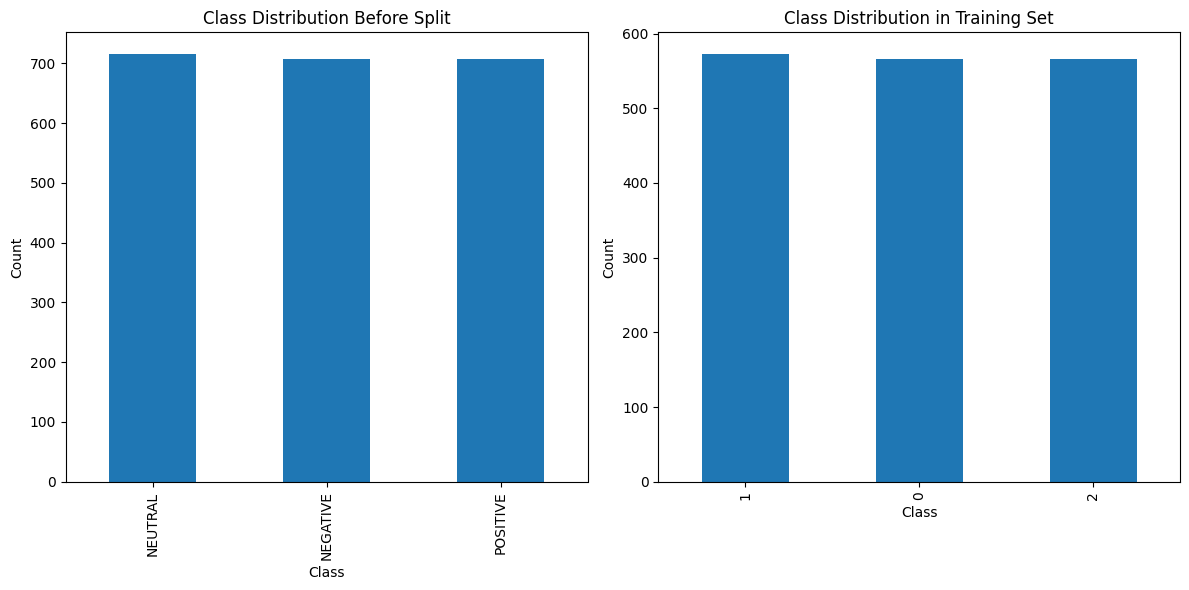

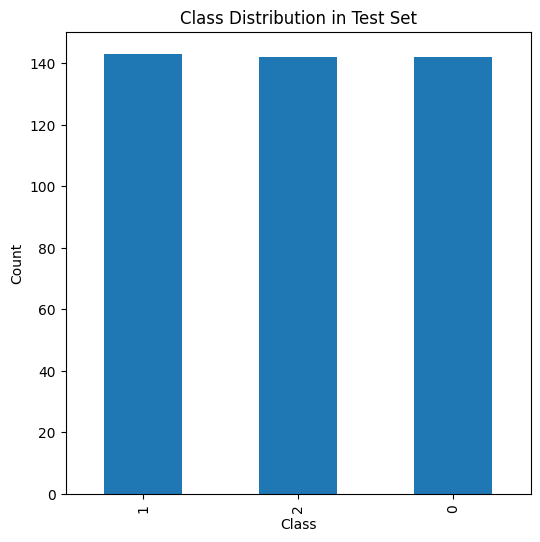

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert y_train and y_test to Series for convenience
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

# Plot distribution before split
df = pd.DataFrame({'target': y})
target_distribution_before = df['target'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
target_distribution_before.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before Split')

# Plot distribution in training set
target_distribution_train = y_train_series.value_counts()

plt.subplot(1, 2, 2)
target_distribution_train.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Training Set')

plt.tight_layout()
plt.show()

# Plot distribution in test set
target_distribution_test = y_test_series.value_counts()

plt.figure(figsize=(6, 6))
target_distribution_test.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution in Test Set')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Sample data
import pandas as pd
import numpy as np



# Creating feature names
all_feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

# Feature selection
k = 10
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Get indices of the selected features
selected_indices = selector.get_support(indices=True)

# Debugging information
print(f"Number of features: {len(all_feature_names)}")
print(f"Selected indices: {selected_indices}")

# Ensure indices are within range
if all(i < len(all_feature_names) for i in selected_indices):
    selected_feature_names = [all_feature_names[i] for i in selected_indices]
    print(f"Selected feature names: {selected_feature_names}")
else:
    print("Error: Some selected indices are out of range.")


Number of features: 2548
Selected indices: [ 152  162  167  172  177 1426 1436 1441 1446 1451]
Selected feature names: ['feature_152', 'feature_162', 'feature_167', 'feature_172', 'feature_177', 'feature_1426', 'feature_1436', 'feature_1441', 'feature_1446', 'feature_1451']


In [ ]:
# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation, Input
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
# Calculate the number of features (input dimensions) from X_train_lda
input_dim = X_train_scaled.shape[1]

num_classes = 3  # Adjust this if you have more or fewer classes


# Define the model
# Build the FCNN model
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu', kernel_regularizer=l2(0.01)))  # First hidden layer
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Second hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(Dense(num_classes, activation='softmax'))  # Output layer


# Convert y_train and y_test to categorical
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Add this line to compile the model


# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train_scaled, y_train,
                    epochs=20,  # Number of epochs
                    batch_size=32,  # Batch size
                    validation_split=0.2,  # Fraction of data to be used as validation data
                    verbose=2,callbacks=[early_stopping])  # Verbosity mode

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


# For additional evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Classification Report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes))

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred_classes))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


43/43 - 2s - 37ms/step - accuracy: 0.5960 - loss: 1.7255 - val_accuracy: 0.6598 - val_loss: 1.4248
Epoch 2/20
43/43 - 0s - 3ms/step - accuracy: 0.6430 - loss: 1.3634 - val_accuracy: 0.6628 - val_loss: 1.1947
Epoch 3/20
43/43 - 0s - 3ms/step - accuracy: 0.6386 - loss: 1.1740 - val_accuracy: 0.6598 - val_loss: 1.0584
Epoch 4/20
43/43 - 0s - 3ms/step - accuracy: 0.6620 - loss: 1.0513 - val_accuracy: 0.6598 - val_loss: 0.9601
Epoch 5/20
43/43 - 0s - 3ms/step - accuracy: 0.6591 - loss: 0.9671 - val_accuracy: 0.6657 - val_loss: 0.8940
Epoch 6/20
43/43 - 0s - 6ms/step - accuracy: 0.6672 - loss: 0.9049 - val_accuracy: 0.6657 - val_loss: 0.8455
Epoch 7/20
43/43 - 0s - 7ms/step - accuracy: 0.6679 - loss: 0.8547 - val_accuracy: 0.6657 - val_loss: 0.8120
Epoch 8/20
43/43 - 0s - 6ms/step - accuracy: 0.6840 - loss: 0.8096 - val_accuracy: 0.6657 - val_loss: 0.7826
Epoch 9/20
43/43 - 0s - 7ms/step - accuracy: 0.6679 - loss: 0.7840 - val_accuracy: 0.6686 - val_loss: 0.7493
Epoch 10/20
43/43 - 0s - 8ms/

In [ ]:
!pip install torch torchvision torchaudio

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Define your model class
class FCNNModel(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(FCNNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)  # Raw logits, no softmax
        return x

# Initialize the model
input_dim = X_train_scaled.shape[1]
num_classes = 3
model = FCNNModel(input_dim, num_classes)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

# Assuming y_train and y_test are one-hot encoded, convert to class indices
y_train_class_indices = np.argmax(y_train, axis=1)
y_test_class_indices = np.argmax(y_test, axis=1)

# Convert to PyTorch tensors
y_train_tensor = torch.tensor(y_train_class_indices, dtype=torch.long)
y_test_tensor = torch.tensor(y_test_class_indices, dtype=torch.long)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    # Print epoch loss
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(X_train_tensor):.4f}')

# Evaluation
model.eval()
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy.item()}")

# Additional evaluation metrics
y_pred = predicted.numpy()
y_test_classes = y_test_tensor.numpy()

print("Classification Report:")
print(classification_report(y_test_classes, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test_classes, y_pred))



Epoch [1/20], Loss: 0.0007
Epoch [2/20], Loss: 0.0006
Epoch [3/20], Loss: 0.0006
Epoch [4/20], Loss: 0.0005
Epoch [5/20], Loss: 0.0005
Epoch [6/20], Loss: 0.0005
Epoch [7/20], Loss: 0.0005
Epoch [8/20], Loss: 0.0005
Epoch [9/20], Loss: 0.0004
Epoch [10/20], Loss: 0.0004
Epoch [11/20], Loss: 0.0004
Epoch [12/20], Loss: 0.0004
Epoch [13/20], Loss: 0.0004
Epoch [14/20], Loss: 0.0004
Epoch [15/20], Loss: 0.0004
Epoch [16/20], Loss: 0.0004
Epoch [17/20], Loss: 0.0004
Epoch [18/20], Loss: 0.0004
Epoch [19/20], Loss: 0.0004
Epoch [20/20], Loss: 0.0004
Test Accuracy: 0.6721311211585999
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88       142
           1       0.59      1.00      0.74       143
           2       1.00      0.01      0.03       142

    accuracy                           0.67       427
   macro avg       0.79      0.67      0.55       427
weighted avg       0.79      0.67      0.55       427

Confusion M

In [ ]:
!pip install captum
!pip install tensorflow



In [ ]:
import torch
from captum.attr import IntegratedGradients
import numpy as np

# Assuming 'model' is your trained PyTorch FCNN model and 'X_test_scaled' is your test data

# Convert the model to evaluation mode
model.eval()

# Initialize IntegratedGradients with the PyTorch model
ig = IntegratedGradients(model)

# Choose an instance from your test data to explain
instance_num = 0
input_instance = X_test_scaled[instance_num].reshape(1, -1)  # Reshape for single instance

# Convert the input instance to a PyTorch tensor
input_instance_tensor = torch.tensor(input_instance, dtype=torch.float32)

# Convert target to an integer
target_class = np.argmax(y_test[instance_num])
target_class = int(target_class)  # Ensure target is an integer

# Calculate attributions
attributions = ig.attribute(
    inputs=input_instance_tensor,
    target=target_class,  # Use integer target
    n_steps=50
)

# Convert attributions to numpy array
attributions = attributions.detach().numpy()

print("Attributions:", attributions)



Attributions: [[-0.05653332 -0.02114025  0.06459434 -0.00888089 -0.00105015 -0.00347464
  -0.07690193 -0.03609547  0.06945251  0.07723381]]


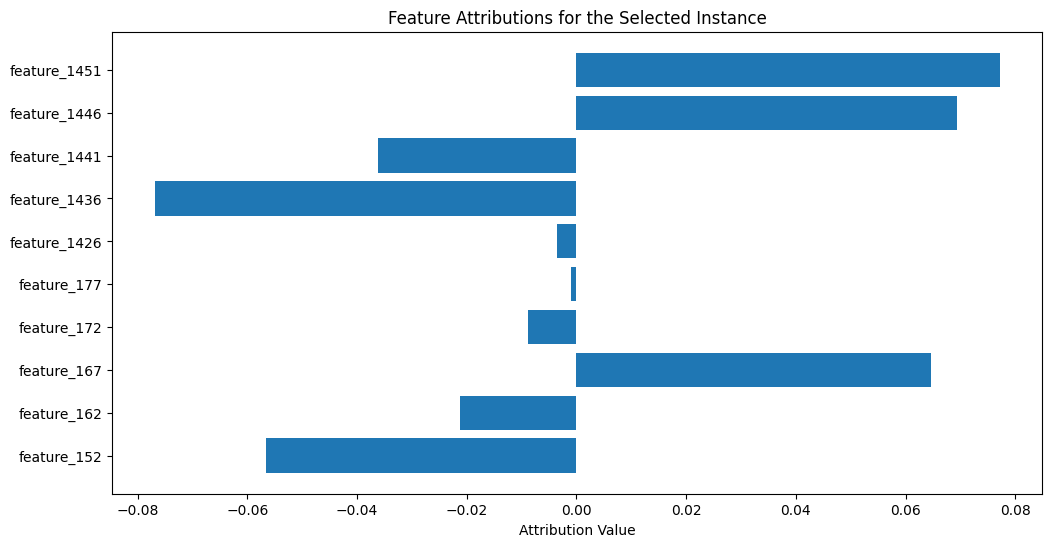

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import numpy as np

# Example original feature names
feature_names =  ['feature_152', 'feature_162', 'feature_167', 'feature_172', 'feature_177', 'feature_1426', 'feature_1436', 'feature_1441', 'feature_1446', 'feature_1451']

import matplotlib.pyplot as plt



# Create a bar chart of the attributions
plt.figure(figsize=(12, 6))
plt.barh(feature_names, attributions.flatten())
plt.xlabel('Attribution Value')
plt.title('Feature Attributions for the Selected Instance')
plt.show()


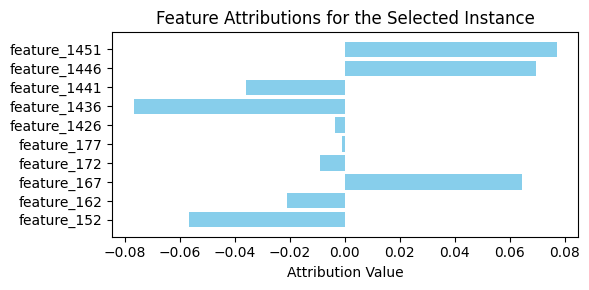

In [ ]:
import matplotlib.pyplot as plt

# Example feature names - ensure this matches the length of the attributions array
feature_names = [
    'feature_152', 'feature_162', 'feature_167', 'feature_172', 'feature_177',
    'feature_1426', 'feature_1436', 'feature_1441', 'feature_1446', 'feature_1451'
]

# Example attributions - ensure this array matches the length of feature_names
attributions = [
    -0.05653332, -0.02114025, 0.06459434, -0.00888089, -0.00105015,
    -0.00347464, -0.07690193, -0.03609547, 0.06945251, 0.07723381
]

# Create a bar chart of the attributions
plt.figure(figsize=(6, 3))
plt.barh(feature_names, attributions, color='skyblue')
plt.xlabel('Attribution Value')
plt.title('Feature Attributions for the Selected Instance')
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


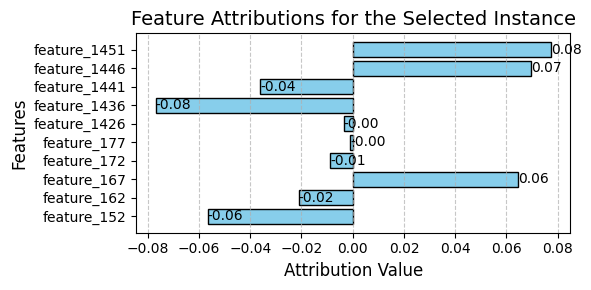

In [ ]:
import matplotlib.pyplot as plt

# Example feature names - ensure this matches the length of the attributions array
feature_names = [
    'feature_152', 'feature_162', 'feature_167', 'feature_172', 'feature_177',
    'feature_1426', 'feature_1436', 'feature_1441', 'feature_1446', 'feature_1451'
]

# Example attributions - ensure this array matches the length of feature_names
attributions = [
    -0.05653332, -0.02114025, 0.06459434, -0.00888089, -0.00105015,
    -0.00347464, -0.07690193, -0.03609547, 0.06945251, 0.07723381
]

# Create a bar chart of the attributions
plt.figure(figsize=(6, 3))
bars = plt.barh(feature_names, attributions, color='skyblue', edgecolor='black')

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', fontsize=10, color='black')

# Customizing axis labels and title
plt.xlabel('Attribution Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Attributions for the Selected Instance', fontsize=14)

# Customize tick parameters for better readability
plt.tick_params(axis='both', which='major', labelsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('feature_attributions.png', dpi=300)

plt.show()


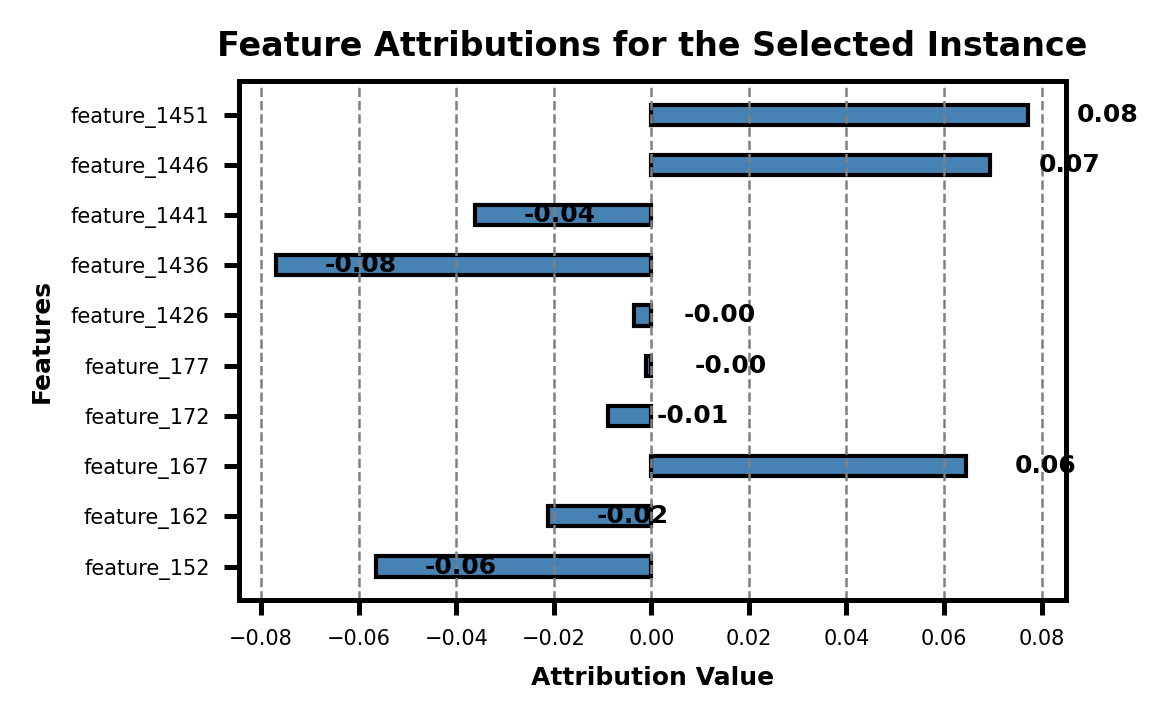

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Example feature names - ensure this matches the length of the attributions array
feature_names = [
    'feature_152', 'feature_162', 'feature_167', 'feature_172', 'feature_177',
    'feature_1426', 'feature_1436', 'feature_1441', 'feature_1446', 'feature_1451'
]

# Example attributions - ensure this array matches the length of feature_names
attributions = [
    -0.05653332, -0.02114025, 0.06459434, -0.00888089, -0.00105015,
    -0.00347464, -0.07690193, -0.03609547, 0.06945251, 0.07723381
]

# Define font properties for consistency
font_properties = {'weight': 'bold', 'size': 6}
title_font_properties = {'weight': 'bold', 'size': 8}

# Create a bar chart of the attributions
plt.figure(figsize=(4, 2.5), dpi=300)
bars = plt.barh(feature_names, attributions, color='steelblue', edgecolor='black', height=0.4)

# Add value labels on the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left',
             fontsize=6, color='black', weight='bold')

# Customizing axis labels and title
plt.xlabel('Attribution Value', **font_properties)
plt.ylabel('Features', **font_properties)
plt.title('Feature Attributions for the Selected Instance', **title_font_properties)

# Customize tick parameters for better readability
plt.tick_params(axis='both', which='major', labelsize=5, width=1.2)
plt.grid(axis='x', linestyle='--', linewidth=0.6, color='gray')

# Add a border around the figure
plt.gca().spines['top'].set_linewidth(1.2)
plt.gca().spines['right'].set_linewidth(1.2)
plt.gca().spines['bottom'].set_linewidth(1.2)
plt.gca().spines['left'].set_linewidth(1.2)

# Adjust layout to prevent clipping
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('feature_attributions_customized.png', dpi=300)

plt.show()




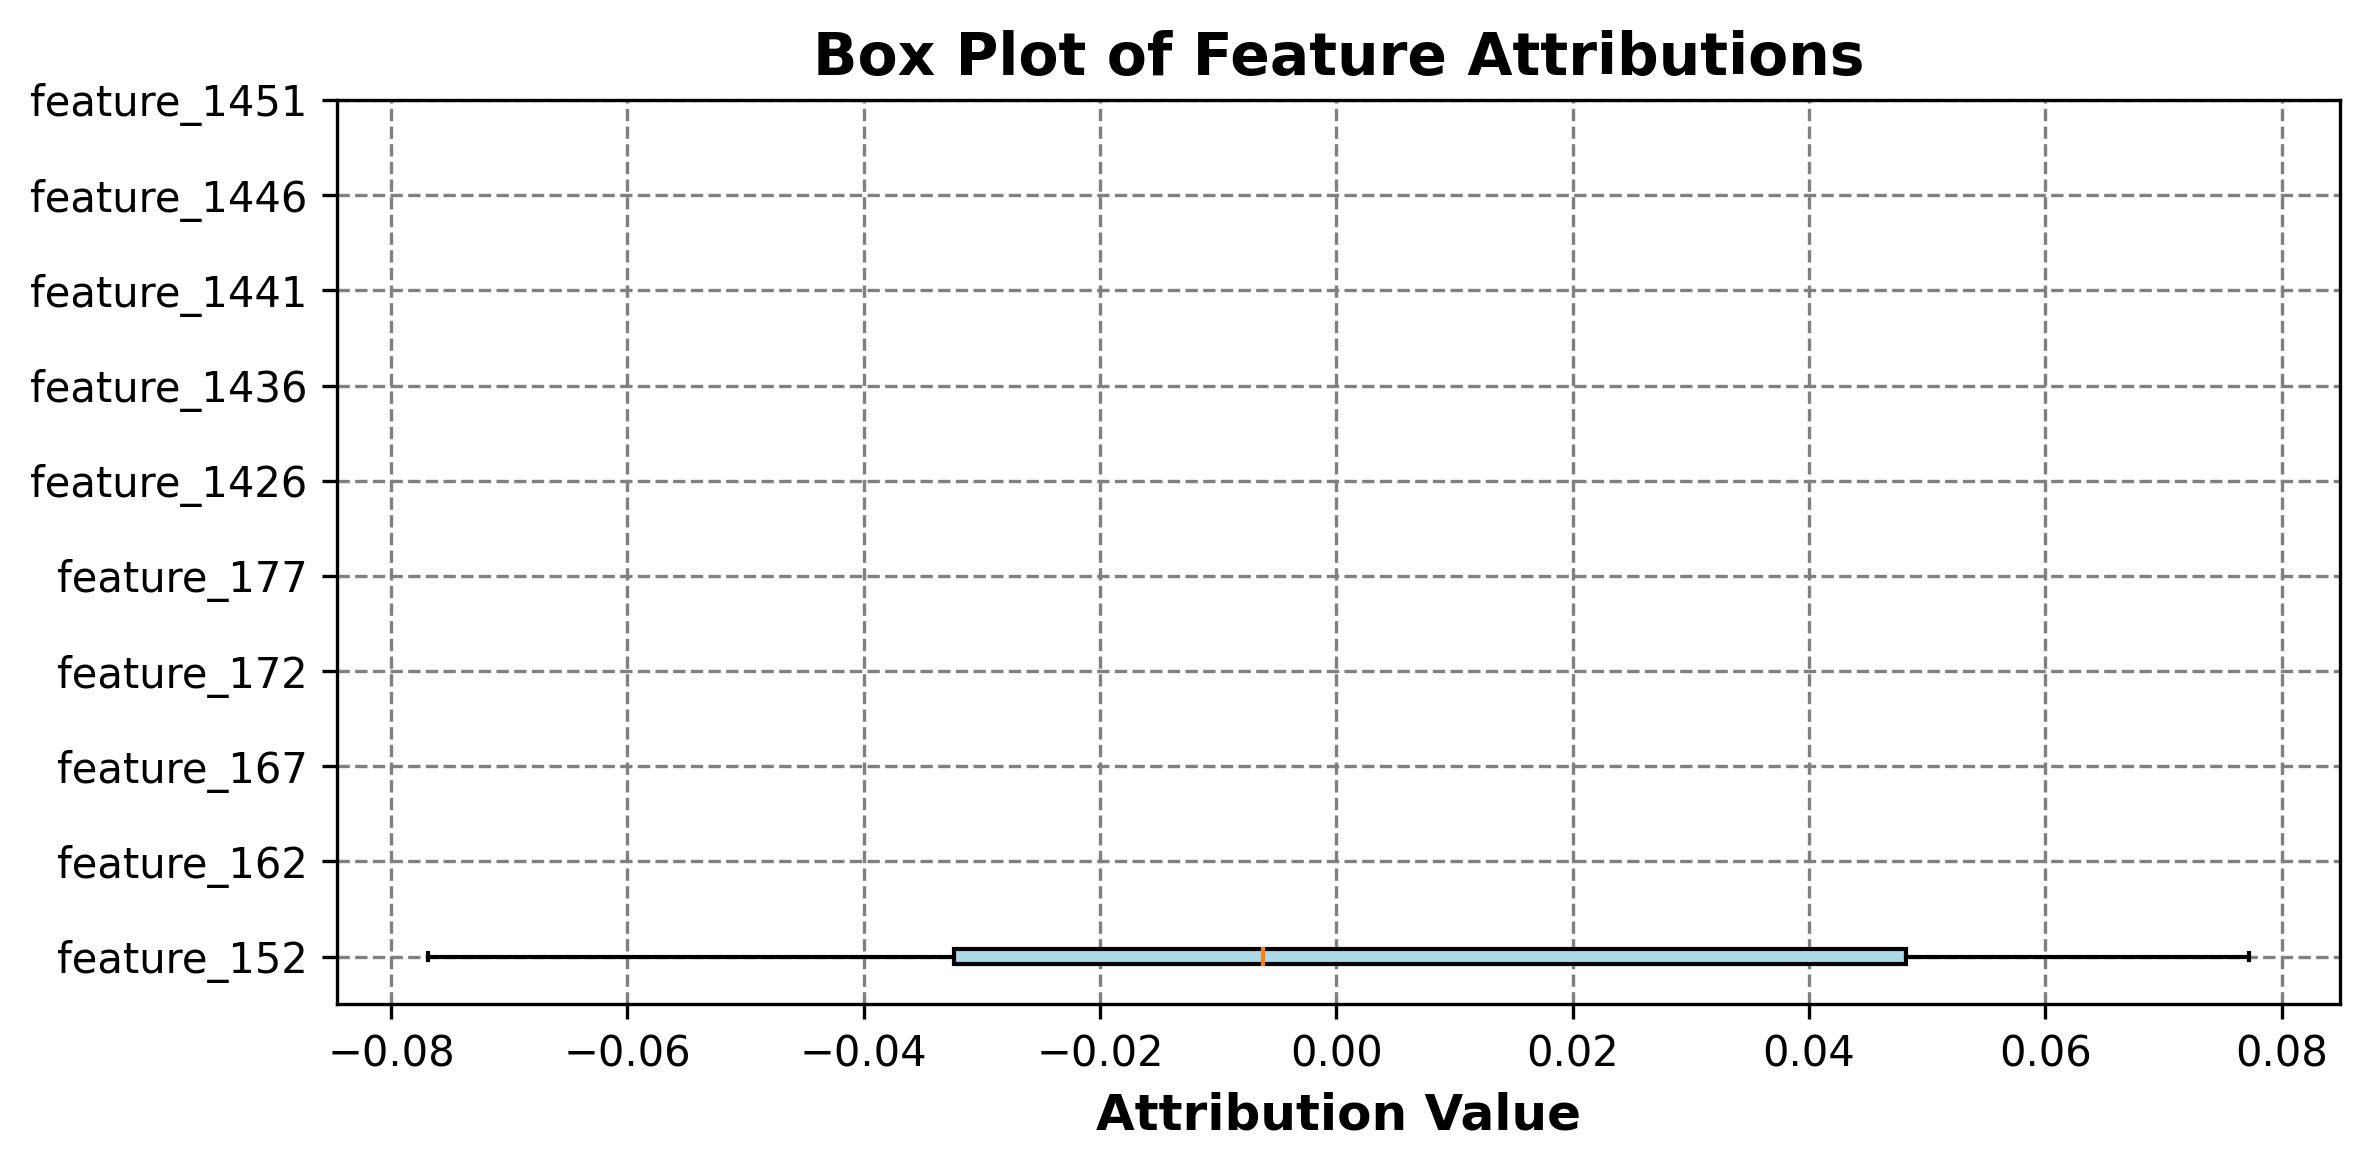

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot (if you have multiple attribution values per feature)
plt.figure(figsize=(8, 4), dpi=300)
plt.boxplot(attributions, vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightblue', edgecolor='black'))
plt.yticks(range(1, len(feature_names) + 1), feature_names)
plt.xlabel('Attribution Value', fontsize=12, weight='bold')
plt.title('Box Plot of Feature Attributions', fontsize=14, weight='bold')
plt.grid(True, linestyle='--', linewidth=0.8, color='gray')
plt.tight_layout()
plt.savefig('box_plot_attributions.png', dpi=300)
plt.show()


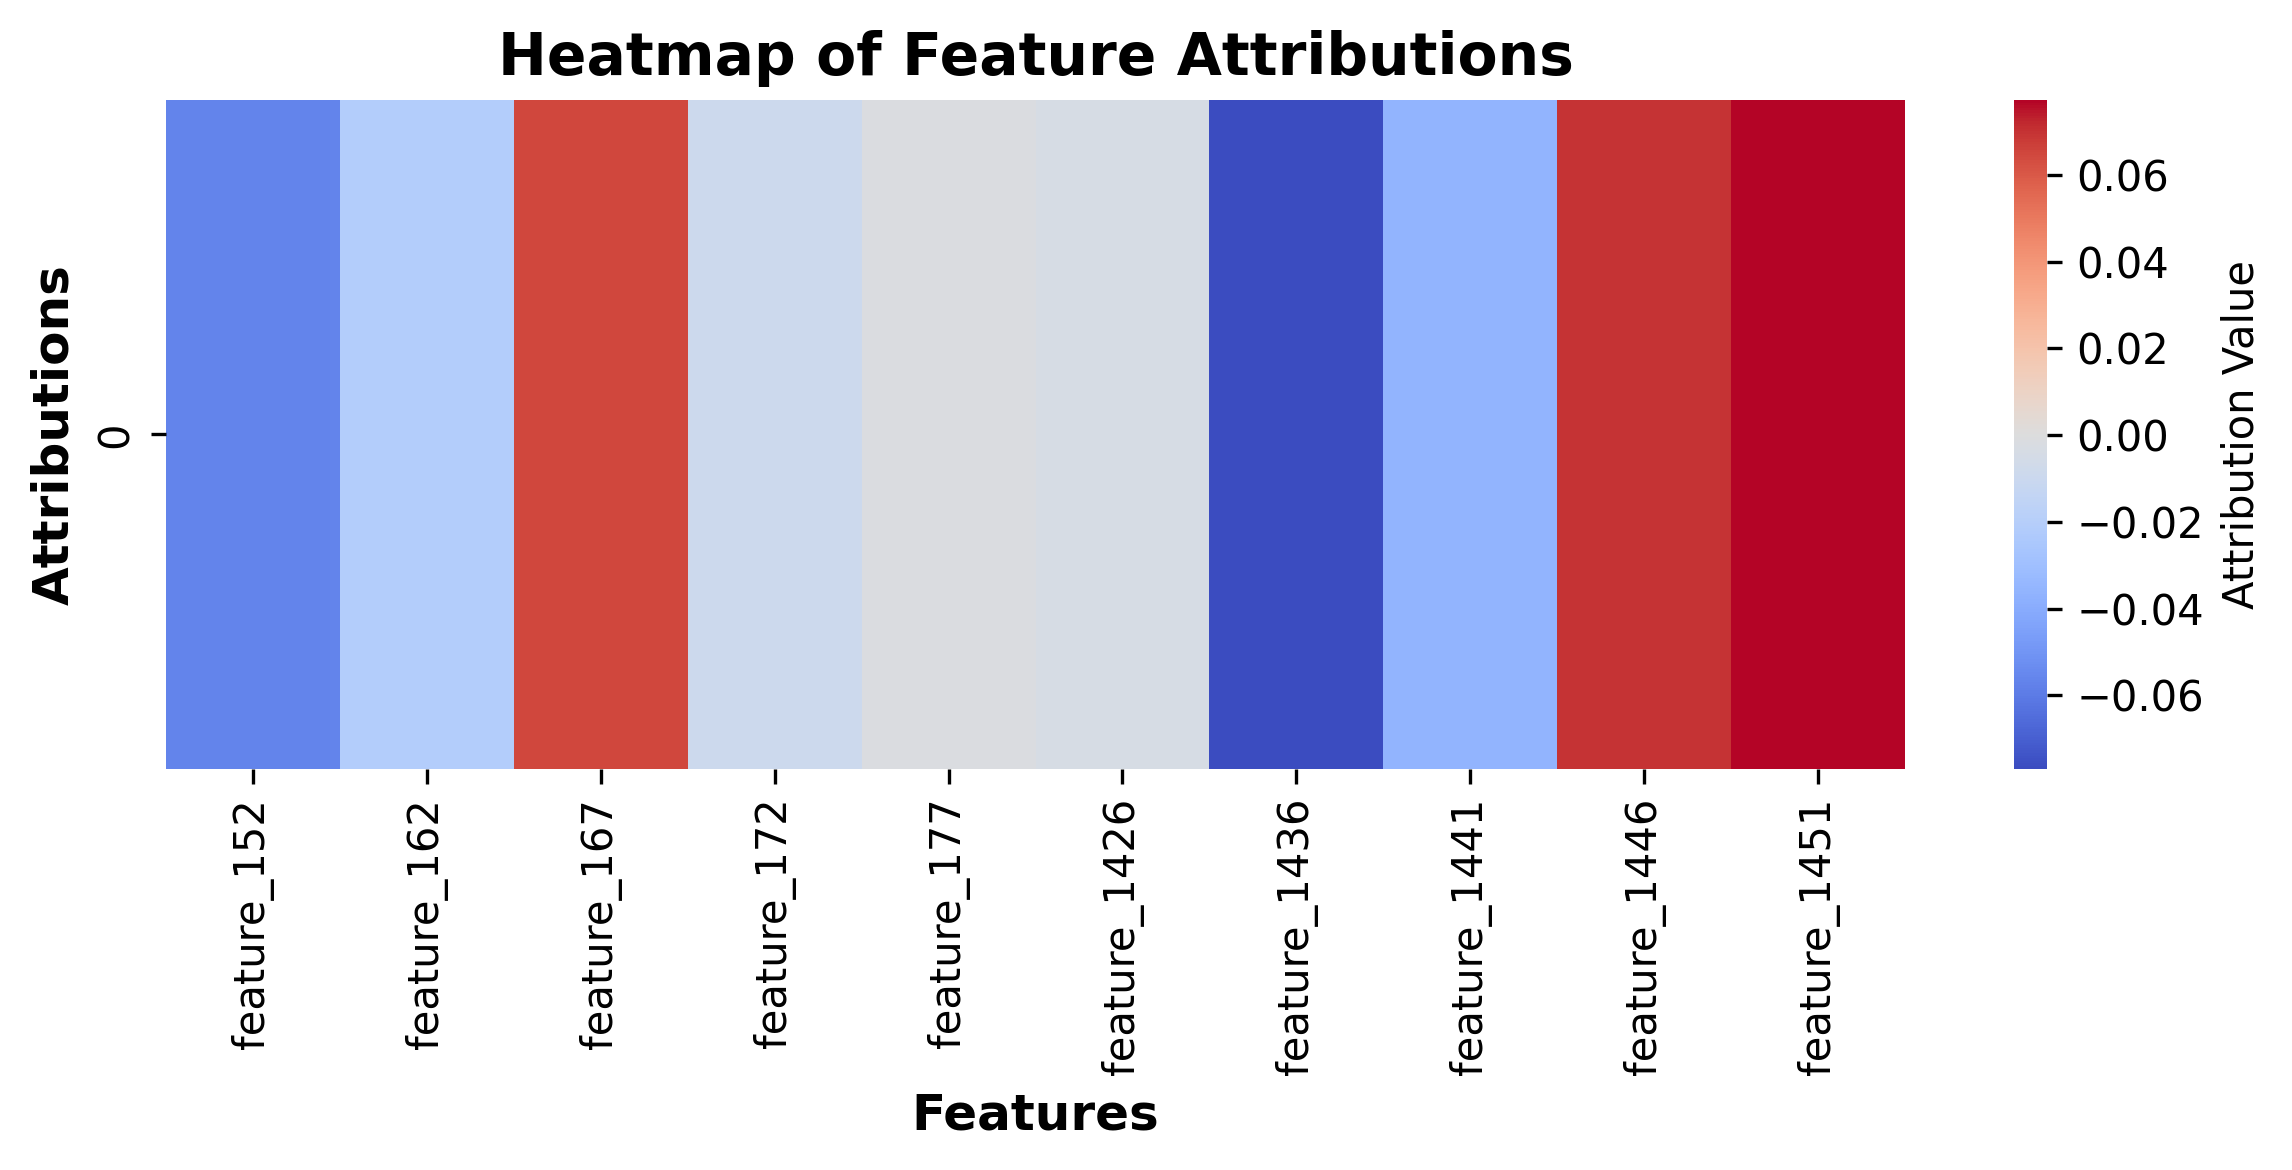

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert attributions to a 2D array (for heatmap)
attributions_matrix = np.reshape(attributions, (1, -1))  # Reshape to 2D for heatmap

plt.figure(figsize=(8, 4), dpi=300)
sns.heatmap(attributions_matrix, xticklabels=feature_names, cmap='coolwarm', cbar_kws={'label': 'Attribution Value'})
plt.xlabel('Features', fontsize=12, weight='bold')
plt.ylabel('Attributions', fontsize=12, weight='bold')
plt.title('Heatmap of Feature Attributions', fontsize=14, weight='bold')
plt.tight_layout()
plt.savefig('heatmap_attributions.png', dpi=300)
plt.show()


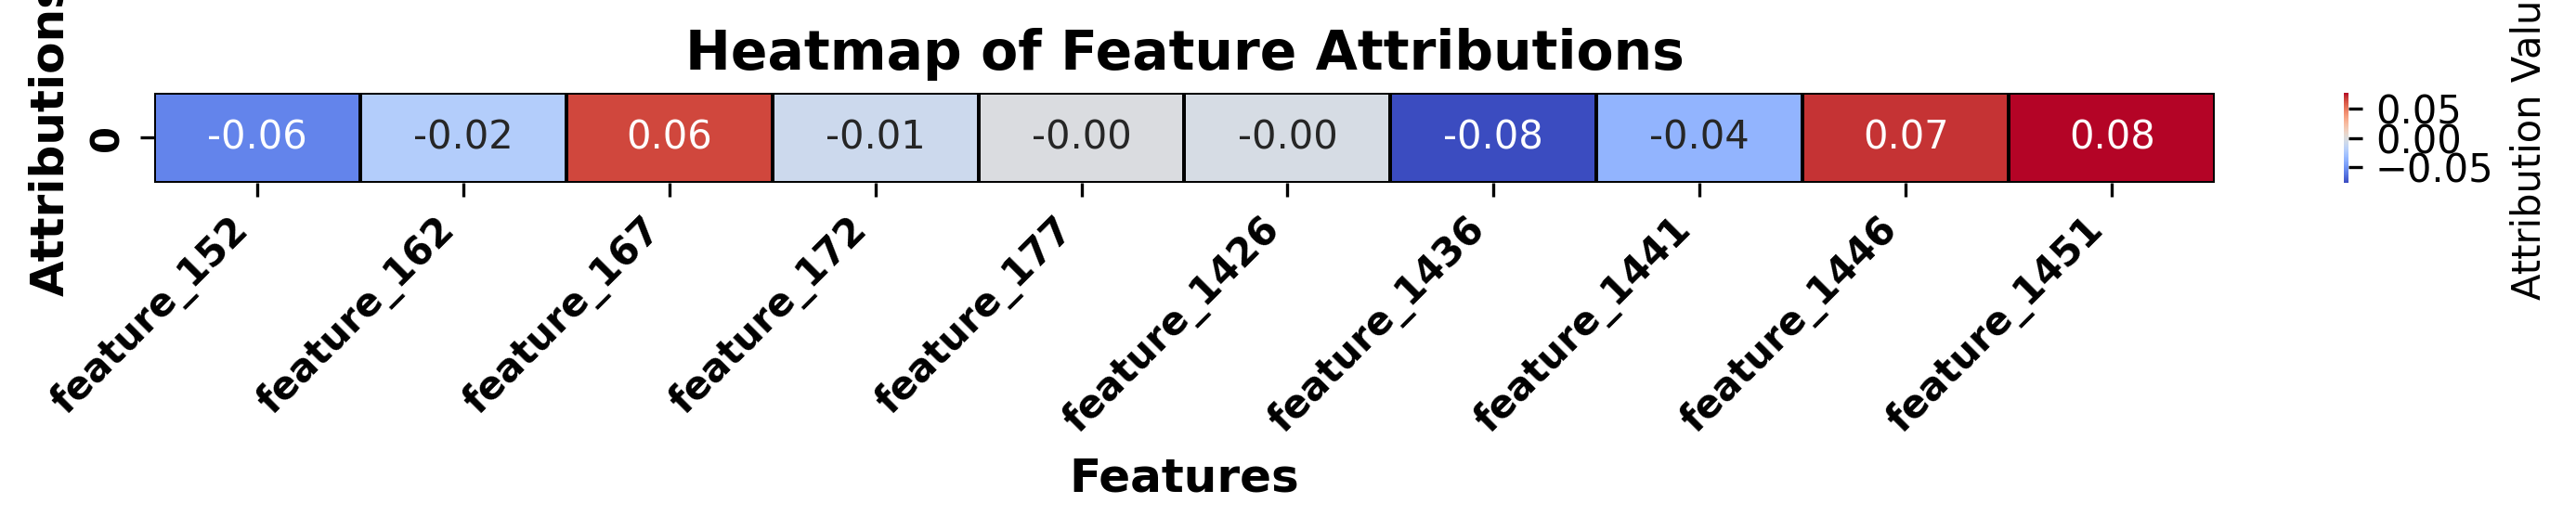

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example data
feature_names = [
    'feature_152', 'feature_162', 'feature_167', 'feature_172', 'feature_177',
    'feature_1426', 'feature_1436', 'feature_1441', 'feature_1446', 'feature_1451'
]
attributions = [
    -0.05653332, -0.02114025, 0.06459434, -0.00888089, -0.00105015,
    -0.00347464, -0.07690193, -0.03609547, 0.06945251, 0.07723381
]

# Convert attributions to a 2D array (for heatmap)
attributions_matrix = np.reshape(attributions, (1, -1))  # Reshape to 2D for heatmap

plt.figure(figsize=(10, 2), dpi=300)
ax = sns.heatmap(
    attributions_matrix,
    xticklabels=feature_names,
    cmap='coolwarm',
    cbar_kws={'label': 'Attribution Value'},
    annot=True,  # Show the numerical values in each cell
    fmt='.2f',   # Format for numerical values
    linewidths=0.5,  # Width of grid lines
    linecolor='black' # Color of grid lines
)

# Customize labels and title
plt.xlabel('Features', fontsize=12, weight='bold')
plt.ylabel('Attributions', fontsize=12, weight='bold')
plt.title('Heatmap of Feature Attributions', fontsize=14, weight='bold')

# Improve layout
plt.xticks(rotation=45, ha='right', fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.tight_layout()

# Save and show the plot
plt.savefig('heatmap_attributions_customized.png', dpi=300)
plt.show()
